In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [29]:
basic=pd.read_csv('location_Avail.csv')
basic.head()

,SOIL,STATE,Rice,Cotton,Sugarcane,Wheat,Millets
0,Aluvial,Maharashtra,1,0,0,1,0
1,Black,Maharashtra,0,1,0,0,0
2,Red,Maharashtra,0,0,1,0,0
3,Laterite,Maharashtra,0,0,0,0,1
4,Mountain,Maharashtra,0,0,0,0,0


In [51]:
location=input("Enter the location :")

Enter the location :Maharashtra


In [34]:
le = preprocessing.LabelEncoder()
x1 = basic["SOIL"]
y1 = basic["STATE"]
x = le.fit_transform(x1)
y = le.fit_transform(y1)
basic1 = basic.merge(pd.DataFrame({'SOIL_C':x,'STATE_C':y}),right_index=True,left_index = True)
basic1.head()

,SOIL,STATE,Rice,Cotton,Sugarcane,Wheat,Millets,SOIL_C,STATE_C
0,Aluvial,Maharashtra,1,0,0,1,0,0,1
1,Black,Maharashtra,0,1,0,0,0,1,1
2,Red,Maharashtra,0,0,1,0,0,5,1
3,Laterite,Maharashtra,0,0,0,0,1,3,1
4,Mountain,Maharashtra,0,0,0,0,0,4,1


In [36]:
X = basic1[['STATE_C','SOIL_C']]
Y = basic1[['Rice','Cotton','Sugarcane','Wheat','Millets']]

In [39]:
classifier = DecisionTreeClassifier()
classifier.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
a = classifier.predict([['1','0']])
a

array([[1, 0, 0, 1, 0]])

In [83]:
for i in range(0,5,1):
    if a[0][i] == 1:
        if i == 0:
            print("Rice")
            crop="Rice"
            data = pd.read_csv('Cropdata.csv')
            #location=input("Enter the location :")
            # crop=input("Enter the crop  :")
            data1=data.query('STATE == "Maharashtra" and CROP == @crop')
            regressor=LinearRegression()
            X=data1[['YEAR']]
            Y=data1['YEILD']
            regressor.fit(X,Y)
            b = regressor.predict([[2018]])
        elif i == 1:
            print("Cotton")
            data = pd.read_csv('Cropdata.csv')
            crop="Cotton"
            #location=input("Enter the location :")
            # crop=input("Enter the crop  :")
            data2=data.query('STATE == "Maharashtra" and CROP == @crop')
            regressor=LinearRegression()
            X=data2[['YEAR']]
            Y=data2['YEILD']
            regressor.fit(X,Y)
        elif i == 2:
            print("Sugarcane")
            crop="Sugarcane"
            data = pd.read_csv('Cropdata.csv')
            #location=input("Enter the location :")
            # crop=input("Enter the crop  :")
            data3=data.query('STATE == "Maharashtra" and CROP == @crop')
            regressor=LinearRegression()
            X=data3[['YEAR']]
            Y=data3['YEILD']
            regressor.fit(X,Y)
        elif i == 3:
            print("Wheat")
            crop="Wheat"
            data = pd.read_csv('Cropdata.csv')
            #location=input("Enter the location :")
            # crop=input("Enter the crop  :")
            data4=data.query('STATE == "Maharashtra" and CROP == @crop')
            regressor=LinearRegression()
            X=data4[['YEAR']]
            Y=data4['YEILD']
            regressor.fit(X,Y)
            c = regressor.predict([[2018]])
        elif i == 4:
            print("Millets")
            crop="Millets"
            data = pd.read_csv('Cropdata.csv')
            #location=input("Enter the location :")
            # crop=input("Enter the crop  :")
            data5=data.query('STATE == "Maharashtra" and CROP == @crop')
            regressor=LinearRegression()
            X=data5[['YEAR']]
            Y=data5['YEILD']
            regressor.fit(X,Y)
c


Rice
Wheat


array([2.36818182])

In [82]:
regressor.predict(1.5)

ValueError: Expected 2D array, got scalar array instead:
array=1.5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [53]:
# data = pd.read_csv('Cropdata.csv')
# # location=input("Enter the location :")
# # crop=input("Enter the crop  :")
# data1=data.query('STATE == @location and CROP == @crop')
# data1

,YEAR,STATE,CROP,YEILD,COST OF CULTIVATION,PROFIT
0,2008,Maharashtra,Rice,1.1,9743.05,5562.90
1,2009,Maharashtra,Rice,1.2,10523.56,7829.89
2,2010,Maharashtra,Rice,1.3,11568.99,6791.09
3,2011,Maharashtra,Rice,1.4,10908.52,8742.12
4,2012,Maharashtra,Rice,1.5,10783.33,8905.98
5,2013,Maharashtra,Rice,1.6,11031.59,3423.77
6,2014,Maharashtra,Rice,1.7,11873.21,6678.88
7,2015,Maharashtra,Rice,1.8,12523.24,7854.90
8,2016,Maharashtra,Rice,1.9,12323.17,12233.89
9,2017,Maharashtra,Rice,2.0,7891.07,2313.42


In [25]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
X=data1[['YEAR']]
Y=data1['YEILD']
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
regressor.score(X,Y)*100

100.0

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size =0.20,random_state=0)
from sklearn.linear_model import LinearRegression

In [38]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
regressor.score(X_train,Y_train)*100

100.0

In [40]:
Y_pred=regressor.predict(X_test)

   Actual  Predicted
4     1.5        1.5
9     2.0        2.0
2     1.3        1.3


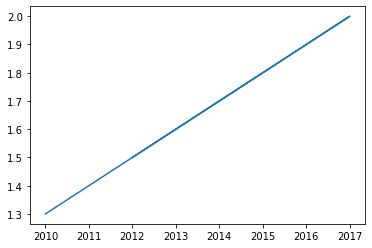

In [41]:
result=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
print(result)
plt.plot(X_test,Y_test)
plt.show()